<a href="https://colab.research.google.com/github/SRenuuu/marks-predictor/blob/main/MarksPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marks Predictor using Linear Regression with Python

1. First, let's start by importing **Pandas** and **Numpy** which are 2 commonly used libraries for Machine Learning in Python. We will be using the **sklearn** library as well. Also we will import **Matplotlib** which provides functions for visualizing data using graphs.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. **Supervised machine learning** is about creating models that precisely map the given inputs to the given outputs.
To create and train a model, we need **Raw Data**. Then we can use that model to predict outputs for any input. Let's feed some sample raw data using a CSV file hosted on the Github repo.

In [2]:
# set path for raw data
url = "https://raw.githubusercontent.com/SRenuuu/marks-predictor/main/student_scores.csv"

3. Now, let's read the contents of the CSV file to a **pandas data frame**

In [3]:
# read raw data CSV
marks_data = pd.read_csv(url)

4. We can preview the first 6 rows of the data frame using **head(6)**

In [4]:
marks_data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


5. Let's preview our raw data on a **scatter graph** using **matplotlib**

Text(0.5, 1.0, 'Marks vs Hours')

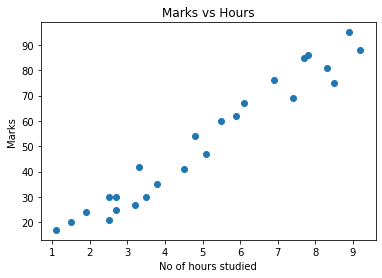

In [5]:
plt.scatter(data=marks_data, x="Hours", y="Scores")
plt.xlabel("No of hours studied")
plt.ylabel("Marks")
plt.title("Marks vs Hours")

6. Before using the raw data to train our model, we have to **pre-process** it. Let's assign the data into two variables : **x and y**. Note that x and y will be of type **pandas series**.

In [26]:
X = marks_data["Hours"]
y = marks_data["Scores"]

  7. 


We need to do **unbiased evaluation** to assess the predictive performance of our model and validate the model.

This means that we cannot evaluate the predictive performance of a model with the same data we used for training. We have to evaluate the model with fresh data that hasn’t been seen by the model before.



---


We can accomplish that by splitting our dataset before using it.

As our problem is not very complex, we split the data into two :
  1. **Train data**
  2. **Test data**

**train_test_split from sklearn** can be used to split arrays or matrices into random train and test subsets.

In supervised machine learning applications, we typically work with two types of sequences :
  1.   **A two-dimensional array with the inputs (X)**
  2.   **A one-dimensional array with the outputs (y)**


---


But our X and y are 1 dimensional arrays with 25 elements each (**X.shape = y.shape = (25,)**)

X.values.reshape(-1,1) will return a numpy 2D array for the pandas series in X. The argument -1 says that the number of rows in the 2D array is unknown, (but we can set it as 25 in this case as we know the number of elements) and 1 says that the number of columns should be 1.

Therefore the shape of the array returned by (X.values.reshape(-1,1)) would be **(25,1)**

(A 2D array with 25 rows and 1 column)

We do not need to change y as it is already a one dimensional array.

According to the library : *Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.*

Note that we have not specified the test_size for train_test_split, therefore it will split the data in a random way.




In [36]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1), y)

8.  

Now that we have split our data, we can train our model using the train data set. Here, we will be using **Linear Regression** from the **Scikit Learn** library which provides ordinary least square linear regression. lf is an object created from the LinearRegression() class.

---


Regression searches for relationships among variables. Regression analysis is one of the most important fields in statistics and machine learning. There are many regression methods available and Linear regression is one of them.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

---

We can use the score() function to test the accuracy of our model. According to that it's accurate up to 94% of the time.


In [44]:
# train model
from sklearn.linear_model import LinearRegression
lf = LinearRegression()
marks_model = lf.fit(X_train, y_train)
lf.score(X_test,y_test)

0.945453888732918

9. Let's visualise our training and test data on a scatter graph using the matplotlib library. I will use blue to show the data points in the training set and red to show the data points in the test set. The line shown in green colour is the best fitting **regression line**.

Text(0.5, 1.0, 'Marks vs Hours')

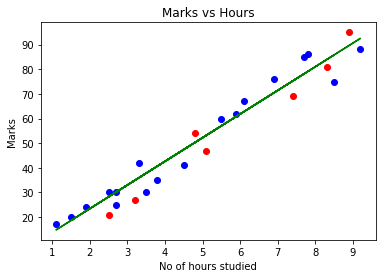

In [46]:
plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_test, y_test, color="red")

plt.plot(X_train, marks_model.predict(X_train), color="green")
plt.xlabel("No of hours studied")
plt.ylabel("Marks")
plt.title("Marks vs Hours")

10. Final step - Now that our model is ready, we can use it to predict the **output (Marks)** for any **input (No of hours studied)**. Note that we have to provide input as a 2D array here as well.

np.round() is used to round the resulting numpy float value to two decimal places.

In [47]:
result = marks_model.predict([[7]])[0]
print("Predicted marks for a student who has studied for 7 hours : " + str(np.round(result,2)))

Predicted marks for a student who has studied for 7 hours : 71.41
